In [1]:
from temporal_utils.dataloader import TemporalDataset, FluidDataset
from temporal_diff_generation import unnormalize_y
from parser import TrainingConfig, ModelConfig, Config
from residual import *
import matplotlib.pyplot as plt
import copy
import tqdm

In [2]:
log_version = "/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/2024-03-27_17-27-17"

In [3]:
data_path = "/home/ubuntu/ml-convection/dataset"

In [4]:
training_config = TrainingConfig
fluid_dataset = FluidDataset(data_path, training_config)

In [5]:
dataset = fluid_dataset.dataset_arr

In [6]:
unnorm_dataset = unnormalize_y(dataset, fluid_dataset.min_value, fluid_dataset.max_value)

In [7]:
t_arr, ux_arr, uy_arr = unnorm_dataset[:,0,:,:], unnorm_dataset[:,1,:,:], unnorm_dataset[:,2,:,:]
t_arr.shape, ux_arr.shape, uy_arr.shape

(torch.Size([10000, 200, 200]),
 torch.Size([10000, 200, 200]),
 torch.Size([10000, 200, 200]))

In [8]:
mass_arr = []
momentum_arr = []
heat_arr = []
for i in range(900, 4000):
    Rs_mass_sum = residual_mass(ux_arr[i], uy_arr[i])
    Rs_momentum_sum = residual_momentum(ux_arr[i], ux_arr[i-1], uy_arr[i], t_arr[i])
    Rs_heat_sum = residual_heat(ux_arr[i], uy_arr[i], t_arr[i], t_arr[i-1])
    mass_arr.append(Rs_mass_sum)
    momentum_arr.append(Rs_momentum_sum)
    heat_arr.append(Rs_heat_sum)

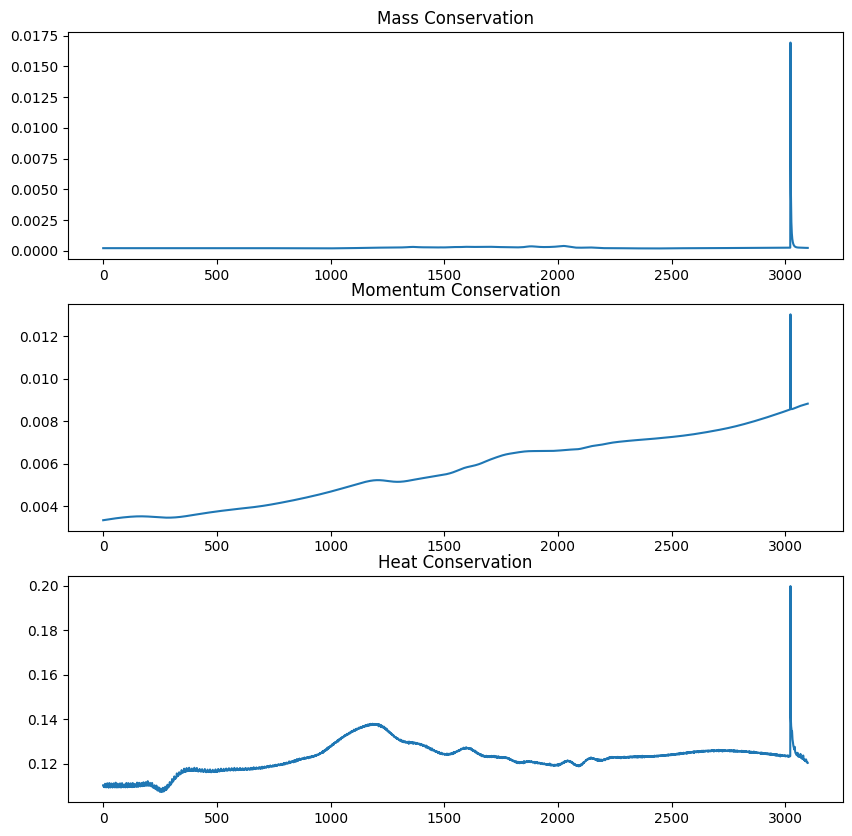

In [9]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].plot(mass_arr)
ax[0].set_title("Mass Conservation")
ax[1].plot(momentum_arr)
ax[1].set_title("Momentum Conservation")
ax[2].plot(heat_arr)
ax[2].set_title("Heat Conservation")
plt.show()

In [10]:
fluid_dataset = FluidDataset(data_path, training_config)
fluid_dataset.dataset_arr = unnormalize_y(fluid_dataset.dataset_arr, fluid_dataset.min_value, fluid_dataset.max_value)
temporal_dataset = TemporalDataset(training_config, fluid_dataset, "test")

In [11]:
n_samples = len(temporal_dataset)

In [12]:
mass_arr = []
momentum_arr = []
heat_arr = []
for i in range(1, n_samples):
    prev_dataset = temporal_dataset[i][0][0]
    prev_t = prev_dataset[0]
    prev_ux = prev_dataset[1]
    curr_dataset = temporal_dataset[i][0][1]
    curr_t = curr_dataset[0]
    curr_ux = curr_dataset[1]
    curr_uy = curr_dataset[2]
    Rs_mass_sum = residual_mass(curr_ux, curr_uy)
    Rs_momentum_sum = residual_momentum(curr_ux, prev_ux, curr_uy, curr_t)
    Rs_heat_sum = residual_heat(curr_ux, curr_uy, curr_t, prev_t)
    
    mass_arr.append(Rs_mass_sum)
    momentum_arr.append(Rs_momentum_sum)
    heat_arr.append(Rs_heat_sum)

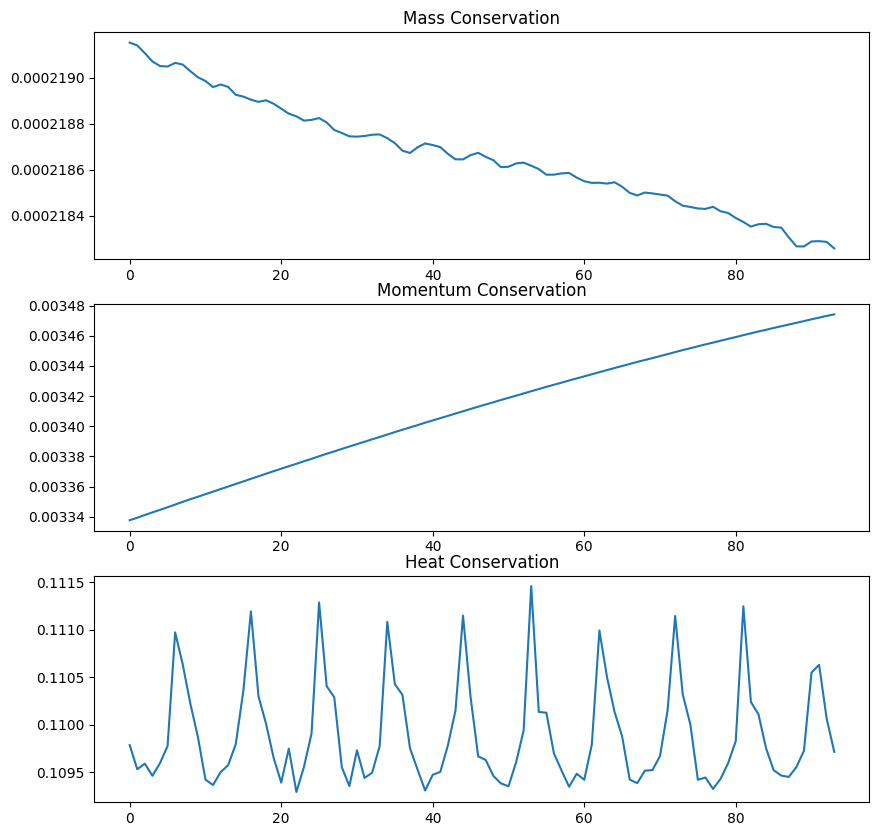

In [13]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].plot(mass_arr)
ax[0].set_title("Mass Conservation")
ax[1].plot(momentum_arr)
ax[1].set_title("Momentum Conservation")
ax[2].plot(heat_arr)
ax[2].set_title("Heat Conservation")
plt.show()

In [14]:
fluid_dataset = FluidDataset(data_path, training_config)
temporal_dataset = TemporalDataset(training_config, fluid_dataset, "test")

In [15]:
mass_arr = []
momentum_arr = []
heat_arr = []
for i in tqdm.trange(1, n_samples):
    d_set = unnormalize_y(copy.deepcopy(temporal_dataset[i][0]), fluid_dataset.min_value, fluid_dataset.max_value)
    prev_dataset = d_set[0]
    prev_t = prev_dataset[0]
    prev_ux = prev_dataset[1]
    curr_dataset = d_set[1]
    curr_t = curr_dataset[0]
    curr_ux = curr_dataset[1]
    curr_uy = curr_dataset[2]
    Rs_mass_sum = residual_mass(curr_ux, curr_uy)
    Rs_momentum_sum = residual_momentum(curr_ux, prev_ux, curr_uy, curr_t)
    Rs_heat_sum = residual_heat(curr_ux, curr_uy, curr_t, prev_t)
    
    mass_arr.append(Rs_mass_sum)
    momentum_arr.append(Rs_momentum_sum)
    heat_arr.append(Rs_heat_sum)

100%|██████████| 94/94 [01:00<00:00,  1.54it/s]


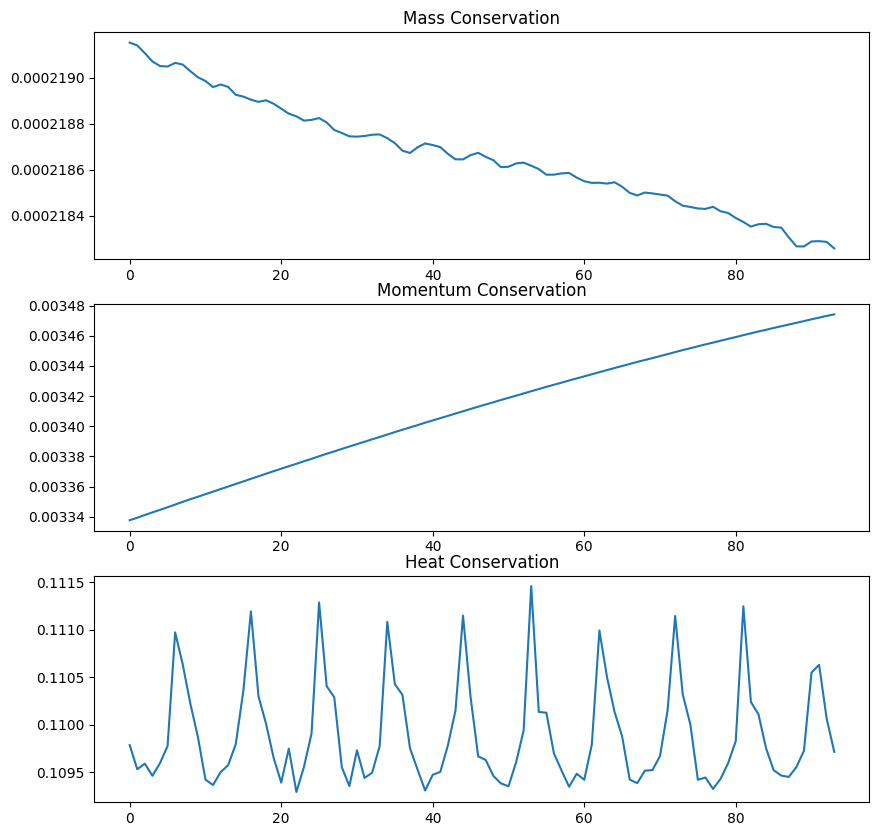

In [16]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].plot(mass_arr)
ax[0].set_title("Mass Conservation")
ax[1].plot(momentum_arr)
ax[1].set_title("Momentum Conservation")
ax[2].plot(heat_arr)
ax[2].set_title("Heat Conservation")
plt.show()

In [123]:
fluid_dataset = FluidDataset(data_path, training_config)
fluid_dataset.dataset_arr = unnormalize_y(fluid_dataset.dataset_arr, fluid_dataset.min_value, fluid_dataset.max_value)
unnorm_temporal_dataset = TemporalDataset(training_config, fluid_dataset, "test")
fluid_dataset = FluidDataset(data_path, training_config)
temporal_dataset = TemporalDataset(training_config, fluid_dataset, "test")

In [126]:
for i in range(len(temporal_dataset)):
    print(unnorm_temporal_dataset[i][0].shape, temporal_dataset[i][0].shape)
    unnorm_data = unnormalize_y(copy.deepcopy(temporal_dataset[i][0]), fluid_dataset.min_value, fluid_dataset.max_value)
    true_unnorm_data = unnorm_temporal_dataset[i][0]
    print(unnorm_data.shape, true_unnorm_data.shape)
    if not np.allclose(unnorm_data, true_unnorm_data):
        print(unnorm_data)
        print("-"*20)
        print(true_unnorm_data)
        break

torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5, 3, 200, 200]) torch.Size([5, 3, 200, 200])
torch.Size([5,

KeyboardInterrupt: 